In [1]:
import pandas as pd
import requests

In [2]:
# coordinates are latitude, longitude pairs
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)

In [3]:
API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"

In [6]:
def count_burglary_within_1_mile(
    lat: float, lon: float, year: int, month: int
) -> int:
    """Calculate number of crimes within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"burglary?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return len(response.json())
    else:
        print(f"Error retrieving data: {response.status_code}")
l = []
for month in range(1,13):
    nb = count_burglary_within_1_mile(*LOCATION_JUBILEE_CAMPUS, 2022, month)
    l.append(nb)
l

[20, 35, 24, 16, 16, 24, 27, 16, 27, 37, 36, 35]

Text(0.5, 1.0, 'Monthly number of burglaries in 2022 ')

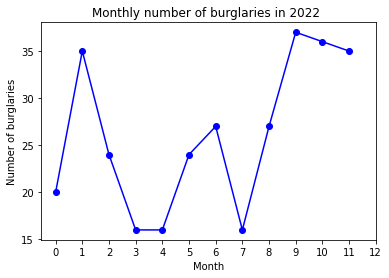

In [12]:
import matplotlib.pyplot as plt

plt.plot(l, color='blue', marker='o',mfc='blue' )
plt.xticks(range(0,len(l)+1, 1))
plt.ylabel('Number of burglaries')
plt.xlabel('Month')
plt.title("Monthly number of burglaries in 2022 ")